# KNICKS PREDICTIONS FOR 2020-2021 SEASON 

In [1]:
#Reading in libraries needed
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('knicks_2019_2020.txt', sep=",", header=1)

In [3]:
data.head()
data.columns

Index(['Rk', 'G', 'Date', 'Unnamed: 3', 'Opp', 'W/L', 'Tm', 'Opp_PTS', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'Unnamed: 24', 'FG.1', 'FGA.1',
       'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1',
       'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'],
      dtype='object')

In [4]:
#Dropping columns
data = data.drop('Rk', axis=1)
data = data.drop('Unnamed: 3', axis=1)
data = data.drop('Unnamed: 24', axis=1)
data = data.drop('FG.1', axis=1)
data = data.drop('FGA.1', axis=1)
data = data.drop('FG%.1', axis=1)
data = data.drop('3P.1', axis=1)
data = data.drop('3PA.1', axis=1)
data = data.drop('3P%.1', axis=1)
data = data.drop('FT.1', axis=1)
data = data.drop('FTA.1', axis=1)
data = data.drop('FT%.1', axis=1)
data = data.drop('ORB.1', axis=1)
data = data.drop('TRB.1', axis=1)
data = data.drop('AST.1', axis=1)
data = data.drop('STL.1', axis=1)
data = data.drop('BLK.1', axis=1)
data = data.drop('TOV.1', axis=1)
data = data.drop('PF.1', axis=1)

In [5]:
data.head()

,G,Date,Opp,W/L,Tm,Opp_PTS,FG,FGA,FG%,3P,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,2019-10-23,SAS,L,111,120,44,94,0.468,10,...,13,18,0.722,5,39,24,16,1,14,32
1,2,2019-10-25,BRK,L,109,113,38,81,0.469,17,...,16,28,0.571,9,39,17,14,4,26,31
2,3,2019-10-26,BOS,L,95,118,31,82,0.378,7,...,26,34,0.765,16,55,15,7,4,23,26
3,4,2019-10-28,CHI,W,105,98,38,91,0.418,9,...,20,32,0.625,25,63,19,3,6,17,19
4,5,2019-10-30,ORL,L,83,95,31,82,0.378,7,...,14,20,0.700,10,44,19,1,10,11,15


In [6]:
data.columns

Index(['G', 'Date', 'Opp', 'W/L', 'Tm', 'Opp_PTS', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF'],
      dtype='object')

# EDA

In [7]:
#Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G,66.0,33.500000,19.196354,1.000,17.25000,33.5000,49.7500,66.000
Tm,66.0,105.803030,13.263275,83.000,96.50000,104.0000,111.7500,143.000
Opp_PTS,66.0,112.257576,13.679081,82.000,103.00000,113.5000,122.0000,140.000
FG,66.0,39.969697,5.689314,28.000,36.00000,39.0000,43.0000,57.000
FGA,66.0,89.333333,6.594481,76.000,85.00000,90.0000,94.0000,110.000
FG%,66.0,0.447439,0.053184,0.308,0.40925,0.4470,0.4775,0.571
3P,66.0,9.560606,3.099026,3.000,8.00000,9.0000,11.0000,18.000
3PA,66.0,28.363636,5.963056,15.000,24.25000,28.5000,32.0000,41.000
3P%,66.0,0.338273,0.093131,0.130,0.29000,0.3220,0.3880,0.680
FT,66.0,16.303030,5.383650,6.000,12.25000,16.0000,20.0000,27.000


<AxesSubplot:>

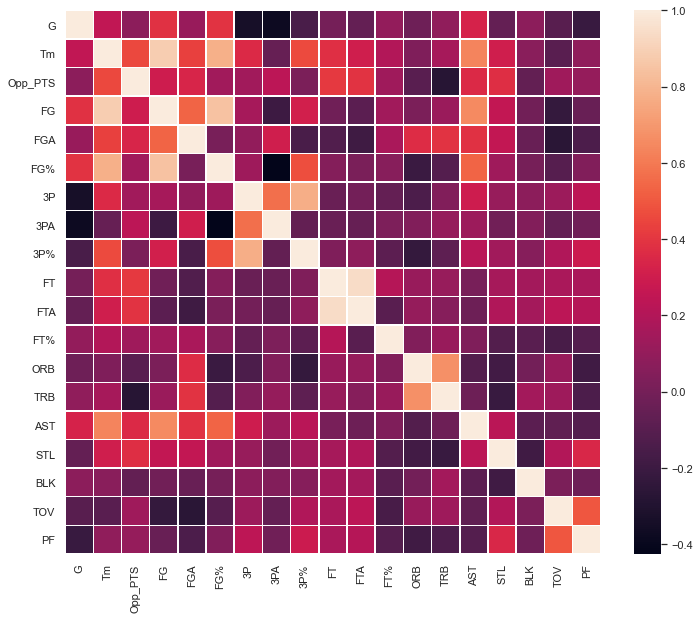

In [8]:
plt.figure(figsize=(12,10))
sns.set_theme(style='whitegrid')

sns.heatmap(data = data.corr(), linewidths=0.5)

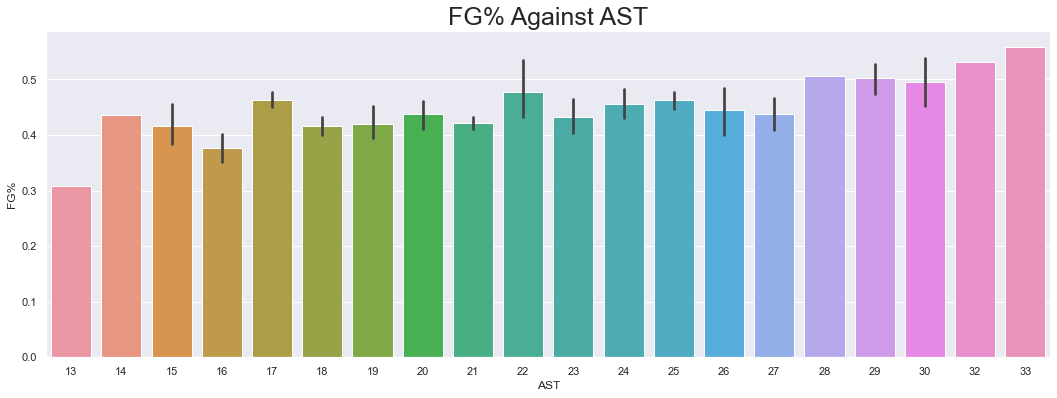

In [9]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(18,6))

fg_ast = sns.barplot(x='AST', y='FG%', data=data)
fg_ast.set_title('FG% Against AST', fontsize=25)
plt.show()

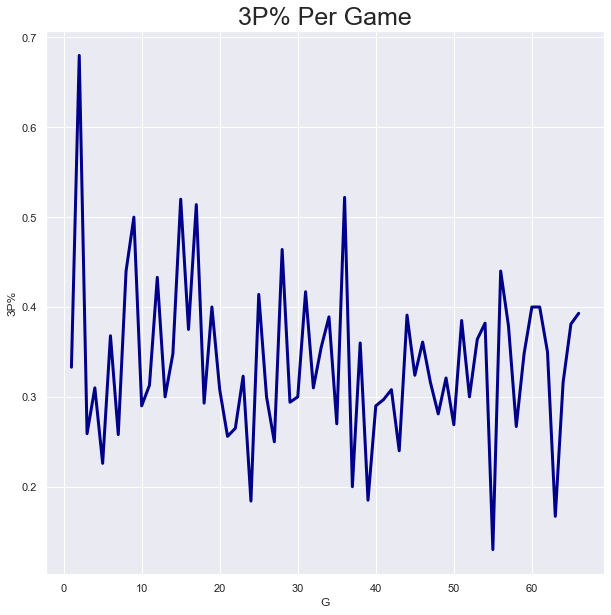

In [10]:
plt.figure(figsize=(10,10))

three = sns.lineplot(x='G', y='3P%', data = data, color='darkblue', lw = 3)
three.set_title('3P% Per Game', fontsize=25)
plt.show()

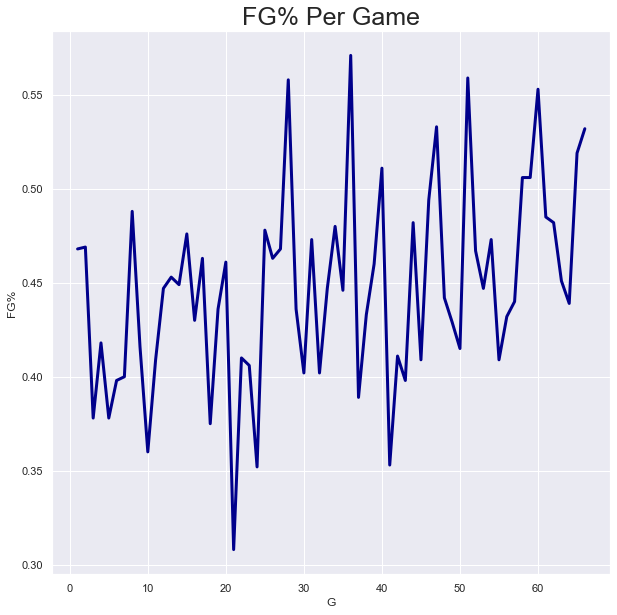

In [11]:
plt.figure(figsize=(10,10))

fg = sns.lineplot(x='G', y='FG%', data = data, color='darkblue', lw = 3)
fg.set_title('FG% Per Game', fontsize=25)
plt.show()

The Knicks became less effective at the 3pt line as the season progressed. They focused on small ball and defense and  this boosted their FG%. 

[Text(0.5, 0, 'Total Points at Game End'), Text(0, 0.5, 'Count')]

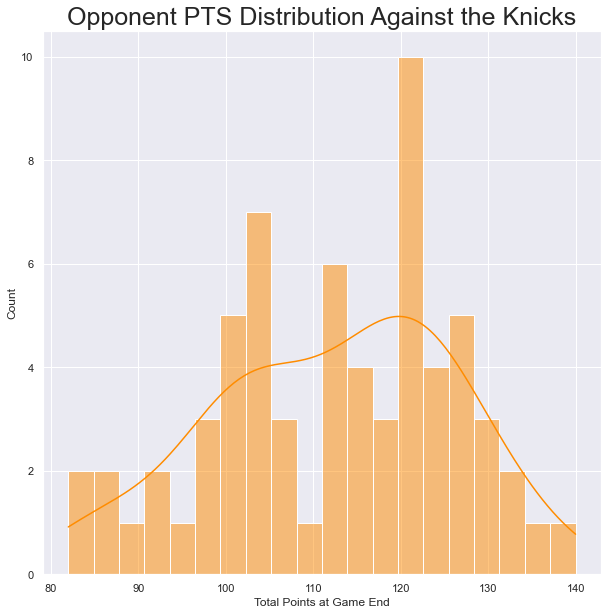

In [12]:
plt.figure(figsize=(10,10))

opp_pts = sns.histplot(data=data, x='Opp_PTS', bins=20, kde=True, color='darkorange')
opp_pts.set_title('Opponent PTS Distribution Against the Knicks', fontsize=25)
opp_pts.set(xlabel='Total Points at Game End', ylabel='Count')

[Text(0.5, 0, 'Total Points at Game End'), Text(0, 0.5, 'Count')]

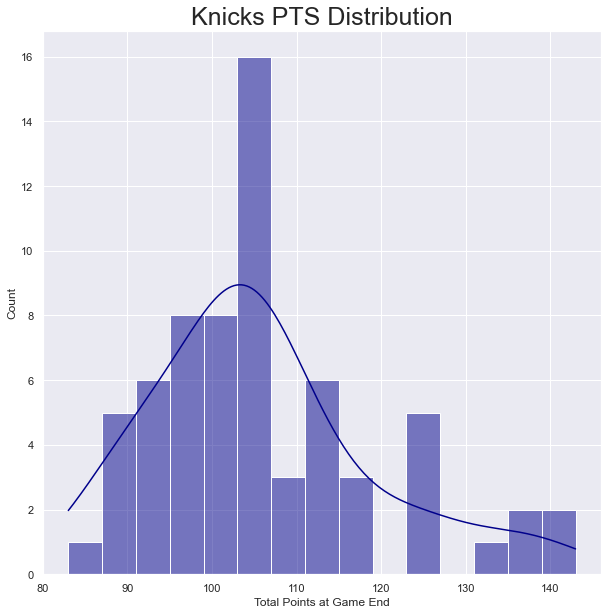

In [13]:
plt.figure(figsize=(10,10))

opp_pts = sns.histplot(data=data, x='Tm', bins=15, kde=True, color='darkblue')
opp_pts.set_title('Knicks PTS Distribution', fontsize=25)
opp_pts.set(xlabel='Total Points at Game End', ylabel='Count')

In [14]:
#Changing Wins/Losses to Dummies
data = pd.get_dummies(data, columns=['W/L'])

In [15]:
data.head()

,G,Date,Opp,Tm,Opp_PTS,FG,FGA,FG%,3P,3PA,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,W/L_L,W/L_W
0,1,2019-10-23,SAS,111,120,44,94,0.468,10,30,...,0.722,5,39,24,16,1,14,32,1,0
1,2,2019-10-25,BRK,109,113,38,81,0.469,17,25,...,0.571,9,39,17,14,4,26,31,1,0
2,3,2019-10-26,BOS,95,118,31,82,0.378,7,27,...,0.765,16,55,15,7,4,23,26,1,0
3,4,2019-10-28,CHI,105,98,38,91,0.418,9,29,...,0.625,25,63,19,3,6,17,19,0,1
4,5,2019-10-30,ORL,83,95,31,82,0.378,7,31,...,0.700,10,44,19,1,10,11,15,1,0


[Text(0.5, 0, 'Loss & Wins'), Text(0, 0.5, 'Count')]

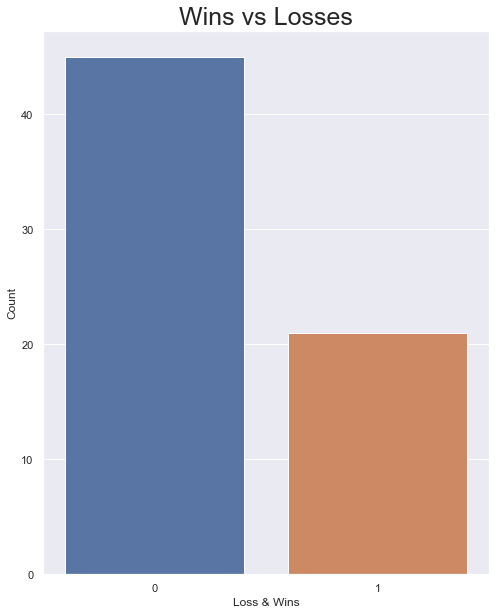

In [16]:
plt.figure(figsize=(8,10))

wins_graph = sns.countplot(x='W/L_W', data=data)
wins_graph.set_title('Wins vs Losses', fontsize=25)
wins_graph.set(xlabel='Loss & Wins', ylabel='Count')

# Log Regression 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
#data = data.drop('W/L_L', axis=1)

In [19]:
data.head()

,G,Date,Opp,Tm,Opp_PTS,FG,FGA,FG%,3P,3PA,...,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,W/L_L,W/L_W
0,1,2019-10-23,SAS,111,120,44,94,0.468,10,30,...,0.722,5,39,24,16,1,14,32,1,0
1,2,2019-10-25,BRK,109,113,38,81,0.469,17,25,...,0.571,9,39,17,14,4,26,31,1,0
2,3,2019-10-26,BOS,95,118,31,82,0.378,7,27,...,0.765,16,55,15,7,4,23,26,1,0
3,4,2019-10-28,CHI,105,98,38,91,0.418,9,29,...,0.625,25,63,19,3,6,17,19,0,1
4,5,2019-10-30,ORL,83,95,31,82,0.378,7,31,...,0.700,10,44,19,1,10,11,15,1,0


In [20]:
X =data[['G','Tm','W/L_L', 'FG%', '3P%', 'FT%','TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF']].values
y = data['W/L_W'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [22]:
logModel = LogisticRegression(max_iter=400)
logModel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [23]:
pred = logModel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      1.00      0.93         7

    accuracy                           0.95        22
   macro avg       0.94      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22



# Neural Network

In [26]:
#Normalizing Data 
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Importing Neural Network Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model = Sequential()

#Hidden Layers
model.add(Dense(30, activation ='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation ='relu'))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(units=1, activation ='sigmoid'))

#Compiling
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
#Fitting the model on our data 
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
         )

Epoch 1/600
1/1 [==============================] - 4s 4s/step - loss: 0.6199 - val_loss: 0.6462
Epoch 2/600
1/1 [==============================] - 0s 133ms/step - loss: 0.6610 - val_loss: 0.6444
Epoch 3/600
1/1 [==============================] - 0s 107ms/step - loss: 0.6212 - val_loss: 0.6426
Epoch 4/600
1/1 [==============================] - 0s 128ms/step - loss: 0.6369 - val_loss: 0.6408
Epoch 5/600
1/1 [==============================] - 0s 76ms/step - loss: 0.6302 - val_loss: 0.6390
Epoch 6/600
1/1 [==============================] - 0s 97ms/step - loss: 0.6241 - val_loss: 0.6373
Epoch 7/600
1/1 [==============================] - 0s 96ms/step - loss: 0.6592 - val_loss: 0.6357
Epoch 8/600
1/1 [==============================] - 0s 90ms/step - loss: 0.6118 - val_loss: 0.6341
Epoch 9/600
1/1 [==============================] - 0s 94ms/step - loss: 0.6467 - val_loss: 0.6324
Epoch 10/600
1/1 [==============================] - 0s 100ms/step - loss: 0.6247 - val_loss: 0.6308
Epoch 11/600
1/1 

1/1 [==============================] - 0s 85ms/step - loss: 0.3746 - val_loss: 0.3946
Epoch 84/600
1/1 [==============================] - 0s 79ms/step - loss: 0.3812 - val_loss: 0.3900
Epoch 85/600
1/1 [==============================] - 0s 74ms/step - loss: 0.3829 - val_loss: 0.3854
Epoch 86/600
1/1 [==============================] - 0s 82ms/step - loss: 0.3882 - val_loss: 0.3806
Epoch 87/600
1/1 [==============================] - 0s 84ms/step - loss: 0.3607 - val_loss: 0.3759
Epoch 88/600
1/1 [==============================] - 0s 74ms/step - loss: 0.3787 - val_loss: 0.3711
Epoch 89/600
1/1 [==============================] - 0s 75ms/step - loss: 0.3707 - val_loss: 0.3664
Epoch 90/600
1/1 [==============================] - 0s 80ms/step - loss: 0.3668 - val_loss: 0.3616
Epoch 91/600
1/1 [==============================] - 0s 79ms/step - loss: 0.3700 - val_loss: 0.3569
Epoch 92/600
1/1 [==============================] - 0s 76ms/step - loss: 0.3833 - val_loss: 0.3522
Epoch 93/600
1/1 [=====

1/1 [==============================] - 0s 82ms/step - loss: 0.1421 - val_loss: 0.1122
Epoch 166/600
1/1 [==============================] - 0s 82ms/step - loss: 0.1248 - val_loss: 0.1104
Epoch 167/600
1/1 [==============================] - 0s 79ms/step - loss: 0.2010 - val_loss: 0.1088
Epoch 168/600
1/1 [==============================] - 0s 90ms/step - loss: 0.1452 - val_loss: 0.1073
Epoch 169/600
1/1 [==============================] - 0s 82ms/step - loss: 0.1335 - val_loss: 0.1058
Epoch 170/600
1/1 [==============================] - 0s 82ms/step - loss: 0.1087 - val_loss: 0.1043
Epoch 171/600
1/1 [==============================] - 0s 84ms/step - loss: 0.1304 - val_loss: 0.1029
Epoch 172/600
1/1 [==============================] - 0s 81ms/step - loss: 0.1506 - val_loss: 0.1014
Epoch 173/600
1/1 [==============================] - 0s 81ms/step - loss: 0.1368 - val_loss: 0.0999
Epoch 174/600
1/1 [==============================] - 0s 86ms/step - loss: 0.0988 - val_loss: 0.0984
Epoch 175/600


Epoch 247/600
1/1 [==============================] - 0s 117ms/step - loss: 0.0584 - val_loss: 0.0359
Epoch 248/600
1/1 [==============================] - 0s 108ms/step - loss: 0.0659 - val_loss: 0.0355
Epoch 249/600
1/1 [==============================] - 0s 113ms/step - loss: 0.0455 - val_loss: 0.0351
Epoch 250/600
1/1 [==============================] - 0s 115ms/step - loss: 0.0711 - val_loss: 0.0347
Epoch 251/600
1/1 [==============================] - 0s 113ms/step - loss: 0.0663 - val_loss: 0.0343
Epoch 252/600
1/1 [==============================] - 0s 105ms/step - loss: 0.0721 - val_loss: 0.0338
Epoch 253/600
1/1 [==============================] - 0s 92ms/step - loss: 0.0620 - val_loss: 0.0334
Epoch 254/600
1/1 [==============================] - 0s 96ms/step - loss: 0.0910 - val_loss: 0.0330
Epoch 255/600
1/1 [==============================] - 0s 82ms/step - loss: 0.0440 - val_loss: 0.0325
Epoch 256/600
1/1 [==============================] - 0s 85ms/step - loss: 0.0452 - val_loss: 0

1/1 [==============================] - 0s 87ms/step - loss: 0.0269 - val_loss: 0.0157
Epoch 329/600
1/1 [==============================] - 0s 112ms/step - loss: 0.0369 - val_loss: 0.0155
Epoch 330/600
1/1 [==============================] - 0s 94ms/step - loss: 0.0205 - val_loss: 0.0154
Epoch 331/600
1/1 [==============================] - 0s 112ms/step - loss: 0.0347 - val_loss: 0.0152
Epoch 332/600
1/1 [==============================] - 0s 94ms/step - loss: 0.0458 - val_loss: 0.0151
Epoch 333/600
1/1 [==============================] - 0s 96ms/step - loss: 0.0269 - val_loss: 0.0149
Epoch 334/600
1/1 [==============================] - 0s 93ms/step - loss: 0.0383 - val_loss: 0.0148
Epoch 335/600
1/1 [==============================] - 0s 97ms/step - loss: 0.0227 - val_loss: 0.0146
Epoch 336/600
1/1 [==============================] - 0s 96ms/step - loss: 0.0233 - val_loss: 0.0145
Epoch 337/600
1/1 [==============================] - 0s 97ms/step - loss: 0.0311 - val_loss: 0.0143
Epoch 338/60

1/1 [==============================] - 0s 154ms/step - loss: 0.0178 - val_loss: 0.0078
Epoch 410/600
1/1 [==============================] - 0s 61ms/step - loss: 0.0345 - val_loss: 0.0077
Epoch 411/600
1/1 [==============================] - 0s 58ms/step - loss: 0.0121 - val_loss: 0.0076
Epoch 412/600
1/1 [==============================] - 0s 49ms/step - loss: 0.0185 - val_loss: 0.0076
Epoch 413/600
1/1 [==============================] - 0s 110ms/step - loss: 0.0210 - val_loss: 0.0075
Epoch 414/600
1/1 [==============================] - 0s 126ms/step - loss: 0.0108 - val_loss: 0.0075
Epoch 415/600
1/1 [==============================] - 0s 109ms/step - loss: 0.0305 - val_loss: 0.0074
Epoch 416/600
1/1 [==============================] - 0s 103ms/step - loss: 0.0164 - val_loss: 0.0074
Epoch 417/600
1/1 [==============================] - 0s 92ms/step - loss: 0.0247 - val_loss: 0.0074
Epoch 418/600
1/1 [==============================] - 0s 81ms/step - loss: 0.0287 - val_loss: 0.0074
Epoch 419

Epoch 491/600
1/1 [==============================] - 0s 74ms/step - loss: 0.0111 - val_loss: 0.0045
Epoch 492/600
1/1 [==============================] - 0s 73ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 493/600
1/1 [==============================] - 0s 76ms/step - loss: 0.0290 - val_loss: 0.0044
Epoch 494/600
1/1 [==============================] - 0s 75ms/step - loss: 0.0124 - val_loss: 0.0044
Epoch 495/600
1/1 [==============================] - 0s 78ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 496/600
1/1 [==============================] - 0s 80ms/step - loss: 0.0125 - val_loss: 0.0044
Epoch 497/600
1/1 [==============================] - 0s 95ms/step - loss: 0.0148 - val_loss: 0.0044
Epoch 498/600
1/1 [==============================] - 0s 91ms/step - loss: 0.0202 - val_loss: 0.0044
Epoch 499/600
1/1 [==============================] - 0s 88ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 500/600
1/1 [==============================] - 0s 79ms/step - loss: 0.0257 - val_loss: 0.0043


1/1 [==============================] - 0s 89ms/step - loss: 0.0090 - val_loss: 0.0029
Epoch 573/600
1/1 [==============================] - 0s 83ms/step - loss: 0.0115 - val_loss: 0.0029
Epoch 574/600
1/1 [==============================] - 0s 71ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 575/600
1/1 [==============================] - 0s 95ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 576/600
1/1 [==============================] - 0s 190ms/step - loss: 0.0492 - val_loss: 0.0029
Epoch 577/600
1/1 [==============================] - 0s 108ms/step - loss: 0.0085 - val_loss: 0.0029
Epoch 578/600
1/1 [==============================] - 0s 104ms/step - loss: 0.0223 - val_loss: 0.0029
Epoch 579/600
1/1 [==============================] - 0s 81ms/step - loss: 0.0197 - val_loss: 0.0029
Epoch 580/600
1/1 [==============================] - 0s 99ms/step - loss: 0.0092 - val_loss: 0.0028
Epoch 581/600
1/1 [==============================] - 0s 107ms/step - loss: 0.0186 - val_loss: 0.0028
Epoch 582/

<AxesSubplot:>

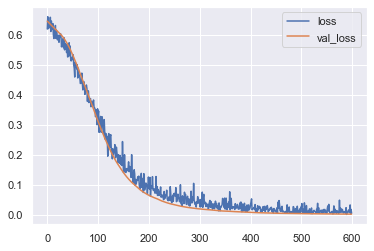

In [33]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [34]:
predictions = model.predict_classes(X_test)

C:\Users\shaki\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



# Predicting a random game 

In [36]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

new_season = data.drop('W/L_W',axis=1).iloc[random_ind]
new_season

G                  25
Date       2019-12-11
Opp               GSW
Tm                124
Opp_PTS           122
FG                 43
FGA                90
FG%             0.478
3P                 12
3PA                29
3P%             0.414
FT                 26
FTA                34
FT%             0.765
ORB                12
TRB                58
AST                25
STL                 5
BLK                 7
TOV                18
PF                 24
W/L_L               0
Name: 24, dtype: object

Our Neural Network actually did pretty good! The stats dropped are eerily similar to actual game results. 